In [1]:
library(IRdisplay)
library(tidyverse)
library(fda)

-- Attaching core tidyverse packages ---------------------------------------------------------------- tidyverse 2.0.0 --
v dplyr     1.1.2     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.1     
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: splines

Loading required package: fds

Loading required package: rainbow

Loading required package: MASS


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


Loading required package: pcaPP

Loading required package: RCurl


Attaching package: 'RCurl'


The following object is masked from 'package:tidyr':

    complete


Lo

# First Steps in the analysis of functional data

png 
  2

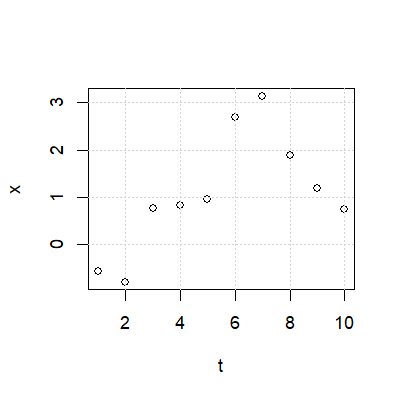

In [2]:
set.seed(123)
x = cumsum(rnorm(10))

png("00-sample.png", width=400, height = 400) 
par(cex=1.5)

plot(x, xlab="t", ylab="x")
grid()

dev.off()
png_data <- readBin("00-sample.png", "raw", file.size("00-sample.png"))
display_png(png_data)

png 
  2

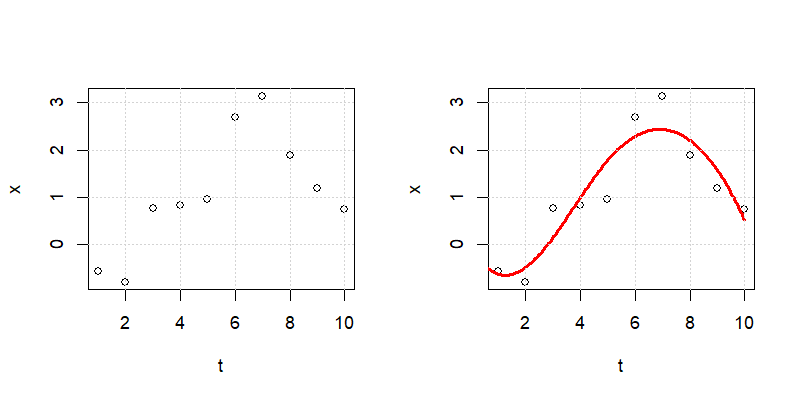

In [3]:
set.seed(123)
x = cumsum(rnorm(10))
B25.basis = create.bspline.basis(rangeval=c(0,10), nbasis=5)
x_fd = smooth.basis(y=x, fdParobj = B25.basis)

png("01-sample.png", width=800, height = 400) 
par(mfrow=c(1,2), cex=1.5)

plot(x, xlab="t", ylab="x")
grid()

plot(x, xlab="t", ylab="x")
lines(x_fd, lwd=3, col="red")
grid()

dev.off()
png_data <- readBin("01-sample.png", "raw", file.size("01-sample.png"))
display_png(png_data)

png 
  2

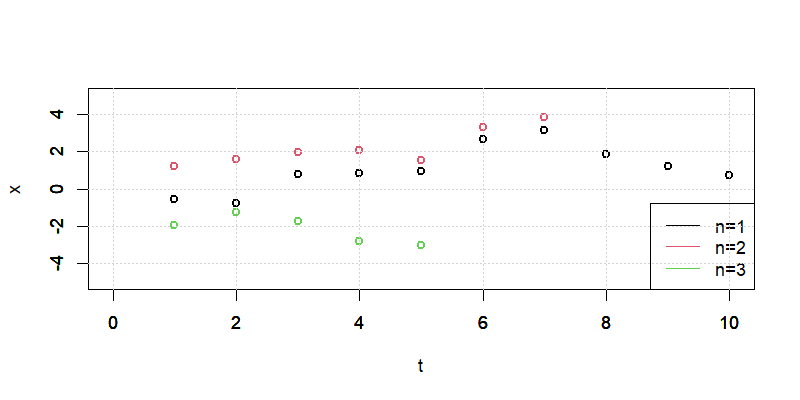

In [4]:
set.seed(123)
x1 = cumsum(rnorm(10))
x2 = cumsum(rnorm(7))
x3 = cumsum(rnorm(5))

png("02-sample.png", width=800, height = 400) 
par(cex=1.5)
plot(x1, xlab="t", ylab="x", xlim=c(0,10), ylim=c(-5,5), lwd=2, col=1)
par(cex=1.5, new=T)
plot(x2, xlab="", ylab="", xlim=c(0,10), ylim=c(-5,5), lwd=2, col=2, ann=F)
par(cex=1.5, new=T)
plot(x3, xlab="", ylab="", xlim=c(0,10), ylim=c(-5,5), lwd=2, col=3, ann=F)
legend("bottomright", legend=c("n=1", "n=2", "n=3"), lty=1, col=1:3)
grid()

dev.off()
png_data <- readBin("02-sample.png", "raw", file.size("02-sample.png"))
display_png(png_data)

png 
  2

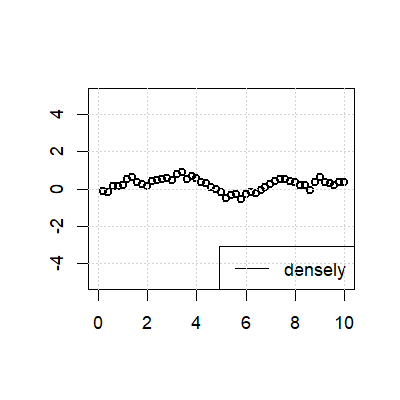

In [60]:
set.seed(123)
x1 = cumsum(rnorm(50))/5

png("03-sample.png", width=400, height = 400) 
par(cex=1.5)
plot(x1, xlab="", ylab="", xlim=c(0,50), ylim=c(-5,5), lwd=2, col=1, xaxt="n")
axis(1, at=seq(0, 50, by=10), 
     labels=expression(0, 2, 4, 6, 8, 10))
legend("bottomright", legend=c("densely"), lty=1, col=1)
grid()

dev.off()
png_data <- readBin("03-sample.png", "raw", file.size("03-sample.png"))
display_png(png_data)

png 
  2

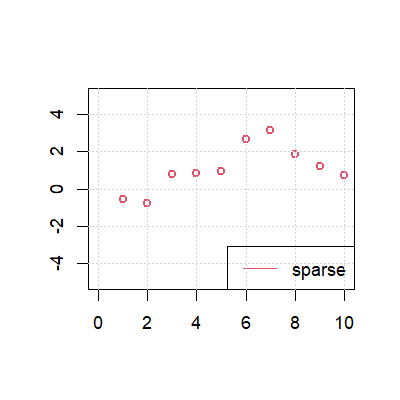

In [61]:
set.seed(123)
x2 = cumsum(rnorm(10))

png("04-sample.png", width=400, height = 400) 
par(cex=1.5)
plot(x2, xlab="", ylab="", xlim=c(0,10), ylim=c(-5,5), lwd=2, col=2)
legend("bottomright", legend=c("sparse"), lty=1, col=2)
grid()

dev.off()
png_data <- readBin("04-sample.png", "raw", file.size("04-sample.png"))
display_png(png_data)

## 1.1 Basis expansion

png 
  2

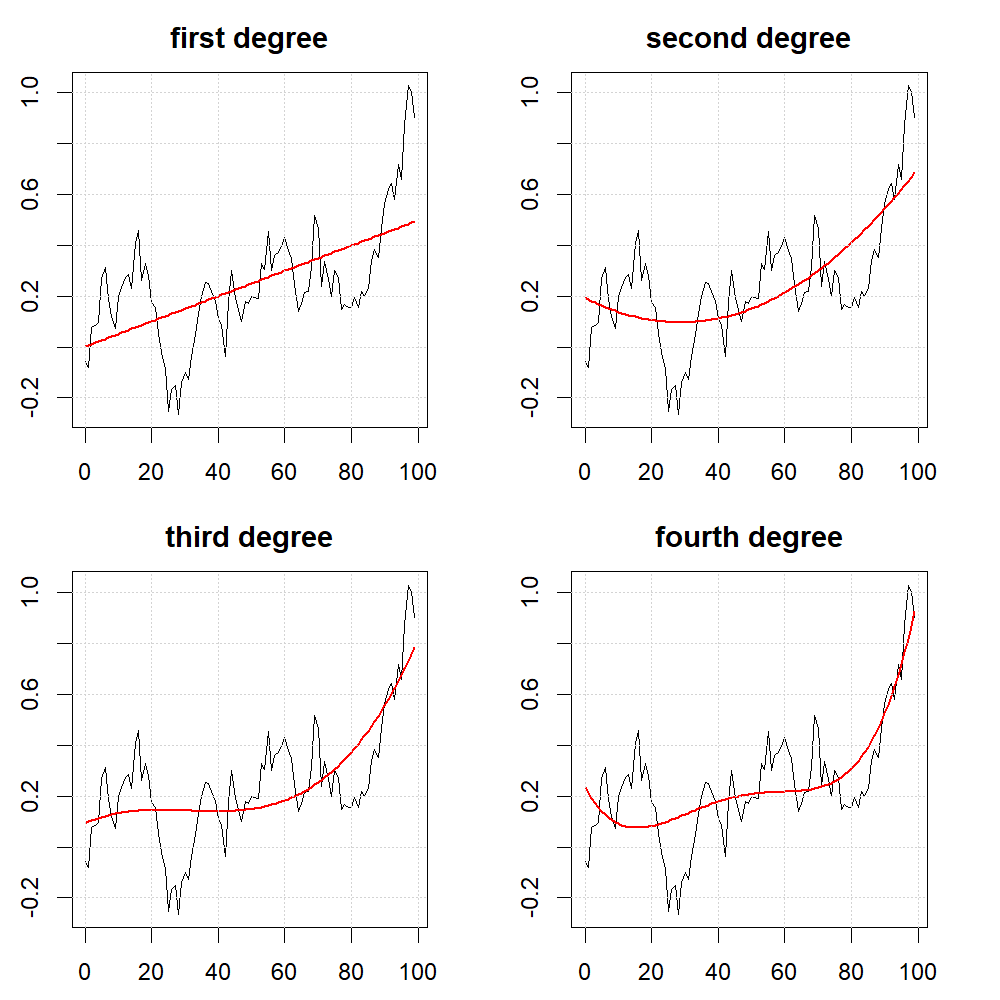

In [62]:
set.seed(123)
n=100
Wiener = cumsum(rnorm(n))/10
data = data.frame(x = seq(0, n-1), y = Wiener)
fit1 <- lm(y ~ poly(x, 1), data = data)
fit2 <- lm(y ~ poly(x, 2), data = data)
fit3 <- lm(y ~ poly(x, 3), data = data)
fit4 <- lm(y ~ poly(x, 4), data = data)

png("1100_basis.png", width=1000, height = 1000) 
par(mfrow=c(2, 2), cex=2, mai=c(1, 1, 1, 1))

plot(data$x, data$y, type = "l", xlab = "", ylab = "", main="first degree")
lines(data$x, fitted(fit1), col = "red", lwd=2)
grid()

plot(data$x, data$y, type = "l", xlab = "", ylab = "", main="second degree")
lines(data$x, fitted(fit2), col = "red", lwd=2)
grid()

plot(data$x, data$y, type = "l", xlab = "", ylab = "", main="third degree")
lines(data$x, fitted(fit3), col = "red", lwd=2)
grid()

plot(data$x, data$y, type = "l", xlab = "", ylab = "", main="fourth degree")
lines(data$x, fitted(fit4), col = "red", lwd=2)
grid()

dev.off()
png_data <- readBin("1100_basis.png", "raw", file.size("1100_basis.png"))
display_png(png_data)

png 
  2

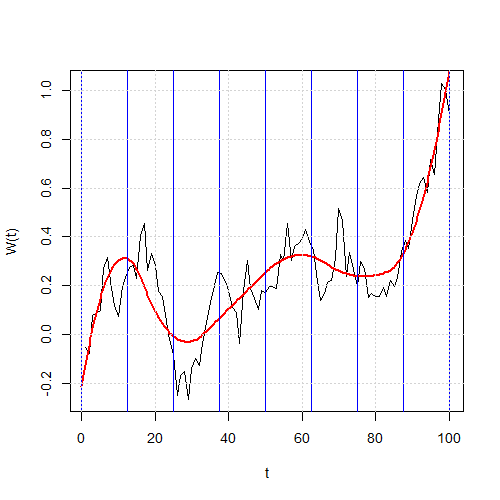

In [63]:
set.seed(123)
n=100
Wiener = cumsum(rnorm(n))/sqrt(n)

Bsp_8_3 = create.bspline.basis(rangeval=c(0, n), nbasis=8, norder=3)
W_fd = smooth.basis(y=Wiener, fdParobj=Bsp_8_3)

png("1101_bsp.png", width=500, height=500) 
par(cex=1.2)
plot.ts(Wiener, xlab="t", ylab="W(t)")
lines(W_fd, lwd=2, col="red")

breaks <- seq(0, 100, length.out = 9)

for(i in 1:length(breaks)){
  abline(v = breaks[i], col = "blue")
}

grid()

dev.off()
png_data = readBin("1101_bsp.png", "raw", file.size("1101_bsp.png"))
display_png(png_data)

png 
  2

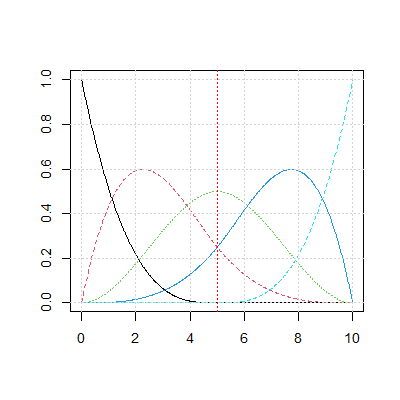

In [64]:
png("110_bsp.png", width=400, height = 400) 
par(cex=1.2)
spline.basis = create.bspline.basis(rangeval=c(0,10), nbasis=5, norder=4)
plot(spline.basis)
grid()

dev.off()
png_data <- readBin("110_bsp.png", "raw", file.size("110_bsp.png"))
display_png(png_data)

png 
  2

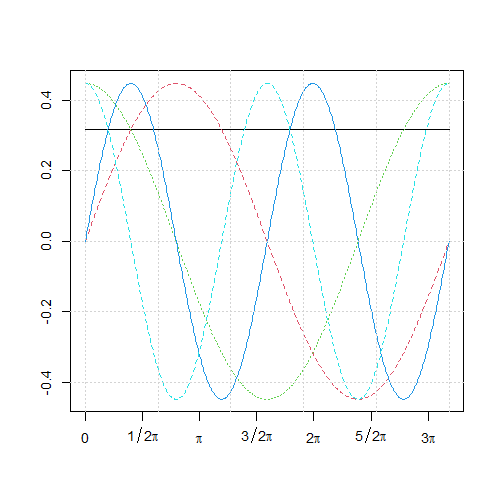

In [65]:
png("111_fou.png", width=500, height = 500) 
par(cex=1.2)
fourier.basis = create.fourier.basis(rangeval=c(0,10), nbasis=5)
plot(fourier.basis, xaxt="n")
axis(1, at=seq(0, 3*pi, by=pi/2), 
     labels=expression(0, 1/2*pi, pi, 3/2*pi, 2*pi, 5/2*pi, 3*pi))
grid()

dev.off()
png_data <- readBin("111_fou.png", "raw", file.size("111_fou.png"))
display_png(png_data)

png 
  2

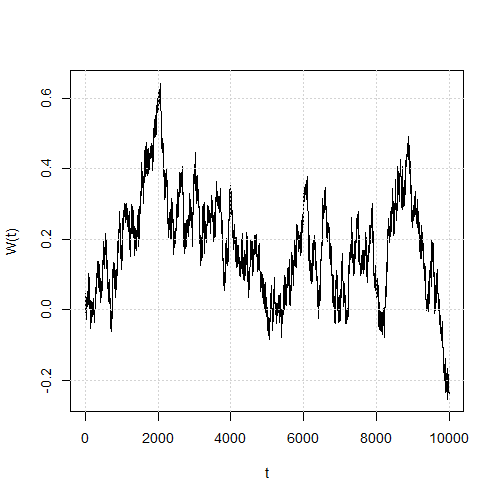

In [66]:
set.seed(123)
Wiener = cumsum(rnorm(10000))/100

png("112_wie.png", width=500, height = 500) 
par(cex=1.2)
plot.ts(Wiener, xlab="t", ylab="W(t)")
grid()

dev.off()
png_data <- readBin("112_wie.png", "raw", file.size("112_wie.png"))
display_png(png_data)

In [5]:
result = matrix(0, nrow = 1000, ncol = 10)
result

0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0


In [7]:
result = matrix(0, nrow = 1000, ncol = 10)

for (i in 1:10){
    Wiener = cumsum(rnorm(1000))/10
    result[,i] = Wiener 
} 

In [21]:
result

0.029065850,-0.023900820,-0.041103565,0.11784260,-0.17851823,0.028315561,-0.08477897,0.014111618,-0.06613013,-0.237857872
0.205504144,0.086783331,-0.064097991,0.17571827,-0.18132392,0.001891567,-0.25070228,-0.039094108,0.13408752,-0.122888303
0.275011573,0.111986167,-0.038877707,0.24483445,-0.10933017,0.059731688,-0.24727944,-0.056298342,0.18097510,-0.064950431
0.177116041,0.139215565,-0.004848237,0.27669194,-0.08183485,0.195557990,-0.26228086,-0.004359784,0.14527124,-0.018659277
0.192228733,0.246670599,0.011328608,0.20937341,-0.14319617,0.245501523,-0.25602150,-0.032741873,0.14686214,-0.148810683
0.232705218,0.226092545,-0.011797260,0.13056124,-0.15317453,0.217436720,-0.28005279,0.013254702,0.29803245,-0.009599450
0.321164276,0.329470447,-0.033630421,0.13281974,0.05031478,0.165066257,-0.32262710,0.021299723,0.20517413,0.055038644
0.251347882,0.205490830,-0.072833613,0.12037194,0.07088433,0.248572756,-0.35568092,0.098554208,0.32188942,0.084654293
0.123327554,0.295102486,-0.095988305,0.20350323,0.11353708,0.243492651,-0.45124162,0.014138624,0.30511951,0.119159963
0.134584546,0.181866464,-0.154980676,0.10661125,0.21022555,0.178367473,-0.44000579,-0.006836903,0.49201147,0.219052614
0.176762548,0.286749747,-0.214159599,0.02733911,0.12688933,0.178942286,-0.43137895,-0.050938248,0.65034008,0.132369089


In [15]:
nrow(result)

[1] 1000

In [17]:
mean_result = matrix(0, nrow = nrow(result), ncol = 1)

for (i in 1:nrow(result)){
    
    row_sum = 0
    
    for (j in 1:ncol(result)){
        row_sum = row_sum + result[i,j]
    }
    
    mean = row_sum / ncol(result)
    mean_result[i] = mean
}

png 
  2

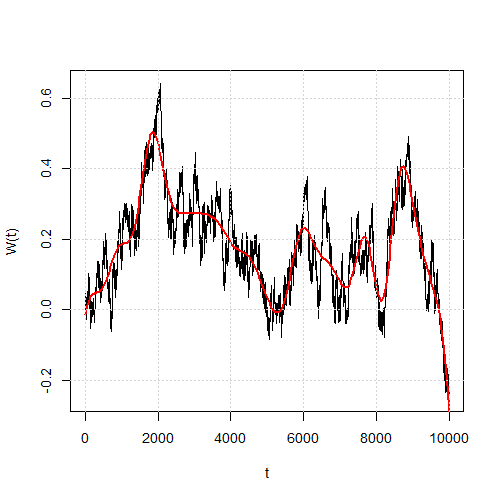

In [67]:
set.seed(123)
Wiener = cumsum(rnorm(10000))/100

png("113_w25.png", width=500, height = 500) 
par(cex=1.2)
plot.ts(Wiener, xlab="t", ylab="W(t)")
B25.basis = create.bspline.basis(rangeval=c(0,10000), nbasis=25)
Wiener.fd = smooth.basis(y=Wiener, fdParobj = B25.basis)
lines(Wiener.fd, lwd=2, col="red")
grid()

dev.off()
png_data <- readBin("113_w25.png", "raw", file.size("113_w25.png"))
display_png(png_data)

png 
  2

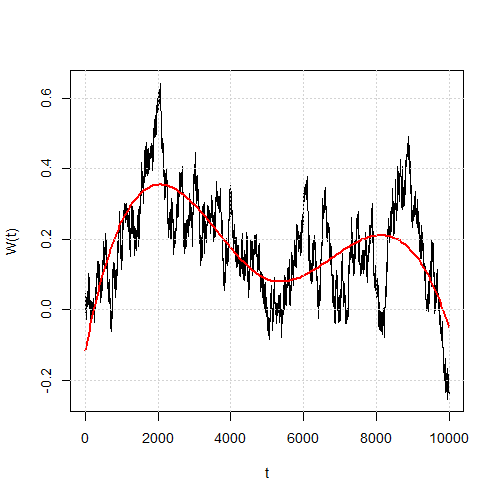

In [68]:
set.seed(123)
Wiener = cumsum(rnorm(10000))/100

png("114_w5.png", width=500, height = 500) 
par(cex=1.2)
plot.ts(Wiener, xlab="t", ylab="W(t)")
B25.basis = create.bspline.basis(rangeval=c(0,10000), nbasis=5)
Wiener.fd = smooth.basis(y=Wiener, fdParobj = B25.basis)
lines(Wiener.fd, lwd=2, col="red")
grid()

dev.off()
png_data <- readBin("114_w5.png", "raw", file.size("114_w5.png"))
display_png(png_data)

## 1.2 Sample mean and covariance

[1] "done"

png 
  2

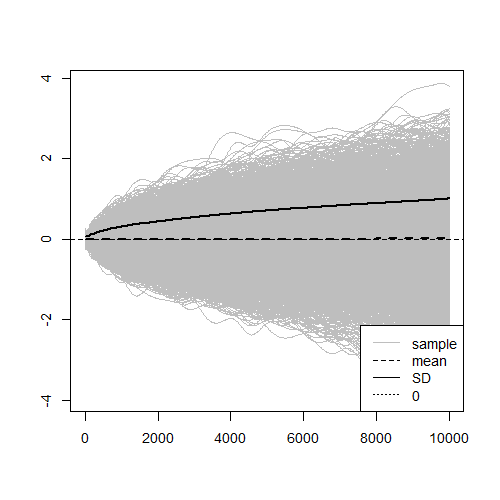

In [106]:
set.seed(123)
N = 5000
W_mat = matrix(0, ncol=N, nrow=10000)
for(n in 1:N){
    W_mat[, n] = cumsum(rnorm(10000)/100)
}
B25_basis = create.bspline.basis(rangeval=c(0,10000), nbasis=25)
W_fd = smooth.basis(y=W_mat, fdParobj=B25_basis)

png("121_mean_ideal.png", width=500, height = 500) 
par(cex=1.2)
plot(W_fd, ylab="", xlab="", col="gray", lty=1)
W_mean = mean.fd(W_fd$fd)
W_sd = std.fd(W_fd$fd)
lines(W_sd, lwd=2)
lines(W_mean, lty=2, lwd=2)
legend("bottomright", legend=c("sample", "mean", "SD","0"), lty=c("solid",  "dashed", "solid", "dotted"), col=c("gray", "black", "black", "black"))

dev.off()
png_data <- readBin("121_mean_ideal.png", "raw", file.size("121_mean_ideal.png"))
display_png(png_data)

png 
  2

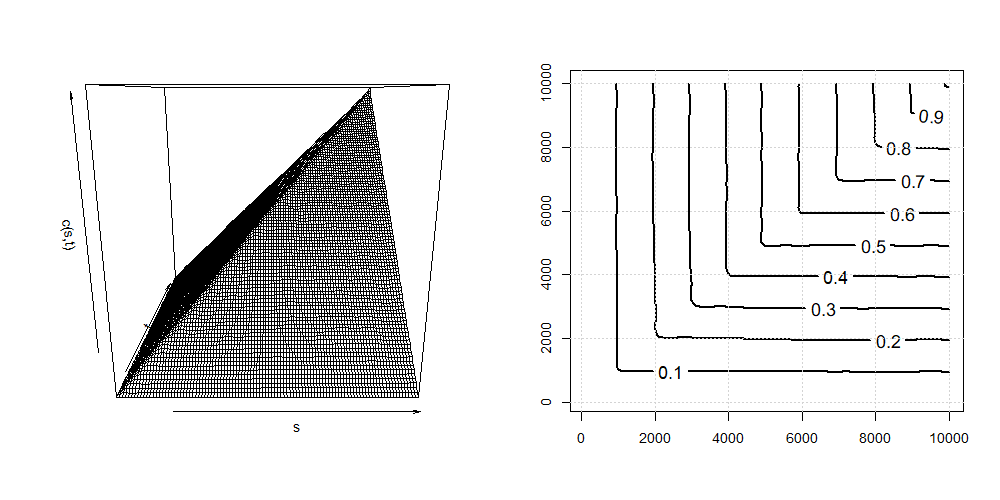

In [107]:
png("122_cov_ideal.png", width=1000, height = 500) 
par(mfrow=c(1,2), cex=1.2)

W_cov = var.fd(W_fd$fd)
grid = (1:100)*100
W_cov_mat = eval.bifd(grid, grid, W_cov)
persp(grid, grid, W_cov_mat, xlab="s",
        ylab="t", zlab="c(s,t)"
)
contour(grid, grid, W_cov_mat, lwd=2, labcex=1.5)
grid()

dev.off()
png_data <- readBin("122_cov_ideal.png", "raw", file.size("122_cov_ideal.png"))
display_png(png_data)

[1] "done"

png 
  2

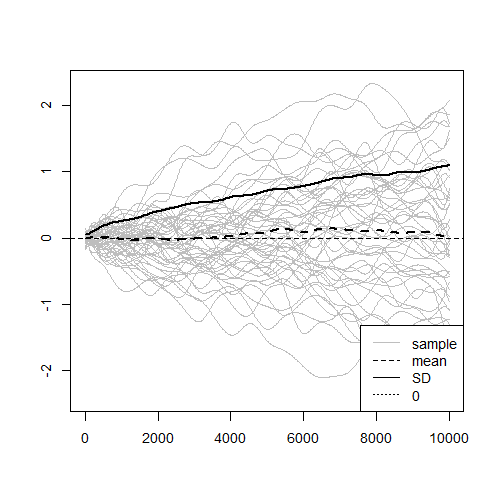

In [108]:
set.seed(123)
N = 50
W_mat = matrix(0, ncol=N, nrow=10000)
for(n in 1:N){
    W_mat[, n] = cumsum(rnorm(10000)/100)
}
B25_basis = create.bspline.basis(rangeval=c(0,10000), nbasis=25)
W_fd = smooth.basis(y=W_mat, fdParobj=B25_basis)

png("121_mean.png", width=500, height = 500) 
par(cex=1.2)
plot(W_fd, ylab="", xlab="", col="gray", lty=1)
W_mean = mean.fd(W_fd$fd)
W_sd = std.fd(W_fd$fd)
lines(W_sd, lwd=2)
lines(W_mean, lty=2, lwd=2)
legend("bottomright", legend=c("sample", "mean", "SD","0"), lty=c("solid",  "dashed", "solid", "dotted"), col=c("gray", "black", "black", "black"))

dev.off()
png_data <- readBin("121_mean.png", "raw", file.size("121_mean.png"))
display_png(png_data)

[1] "done"

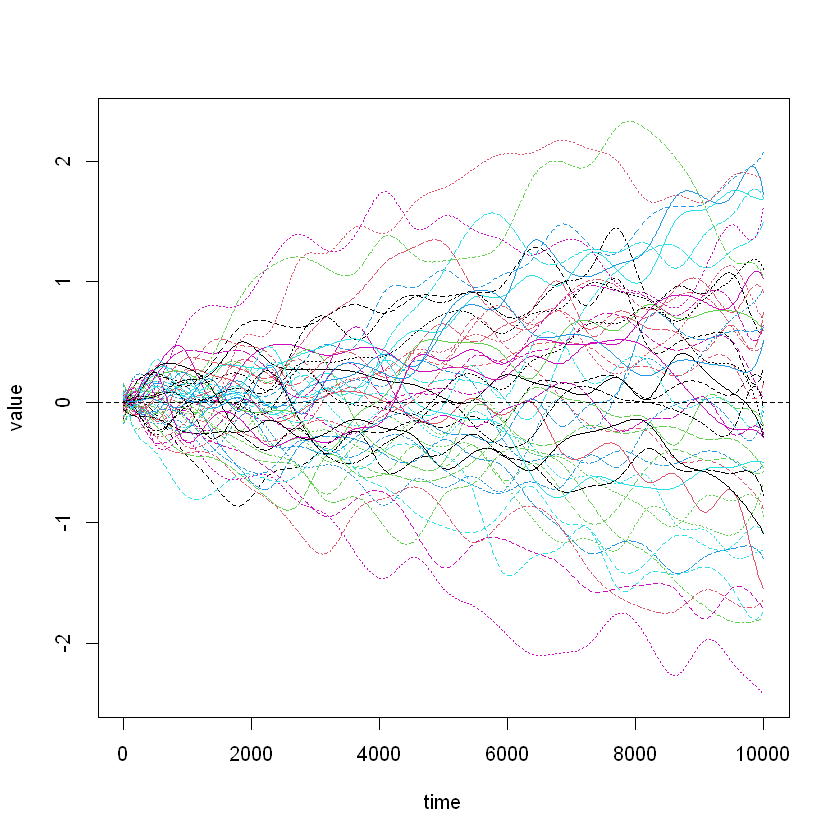

In [109]:
plot(W_fd)

png 
  2

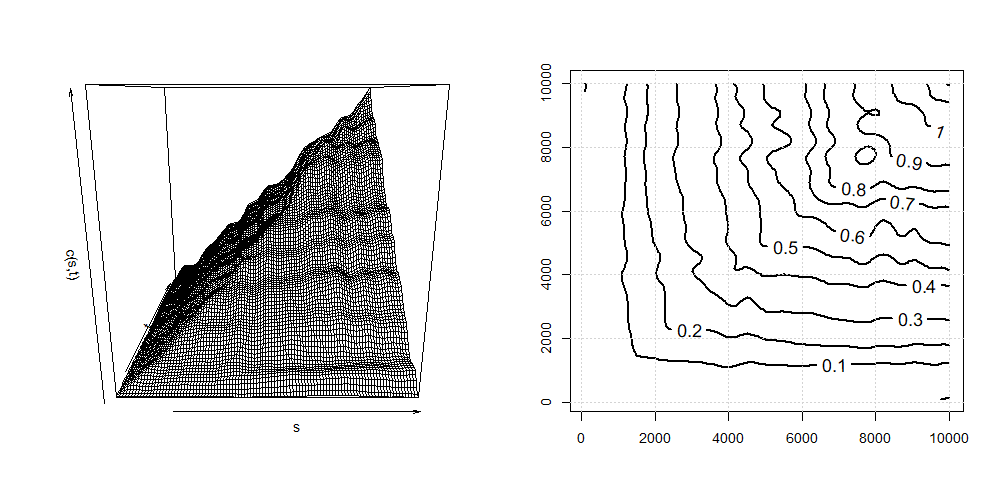

In [110]:
png("122_cov.png", width=1000, height = 500) 
par(mfrow=c(1,2), cex=1.2)

W_cov = var.fd(W_fd$fd)
grid = (1:100)*100
W_cov_mat = eval.bifd(grid, grid, W_cov)
persp(grid, grid, W_cov_mat, xlab="s",
        ylab="t", zlab="c(s,t)"
)
contour(grid, grid, W_cov_mat, lwd=2, labcex=1.5)
grid()

dev.off()
png_data <- readBin("122_cov.png", "raw", file.size("122_cov.png"))
display_png(png_data)

png 
  2

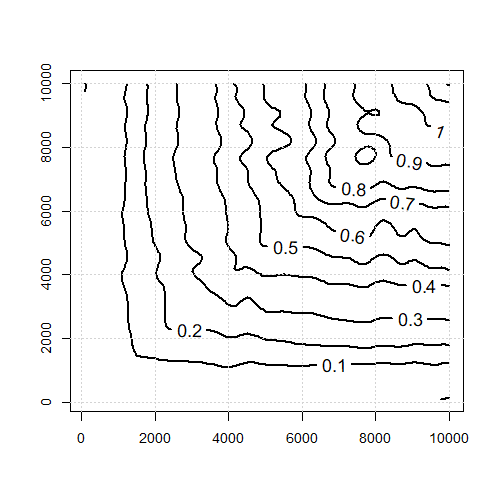

In [111]:
png("122_cov_con.png", width=500, height = 500) 

par(cex=1.2)
contour(grid, grid, W_cov_mat, lwd=2, labcex=1.5)
grid()

dev.off()
png_data <- readBin("122_cov_con.png", "raw", file.size("122_cov_con.png"))
display_png(png_data)

## 1.3 Principal component function    

In [137]:
set.seed(123)
N = 50
W_mat = matrix(0, ncol=N, nrow=10000)
for(n in 1:N){
    W_mat[, n] = cumsum(rnorm(10000)/100)
}
B25_basis = create.bspline.basis(rangeval=c(0,10000), nbasis=25)
W_fd = smooth.basis(y=W_mat, fdParobj=B25_basis)
# plot(W_fd, ylab="", xlab="", col="gray", lty=1)

[1] "done"

0.8614332 0.07008462 0.02193785 0.01387032 
0.8614332 0.9315178 0.9534557 0.967326 


png 
  2

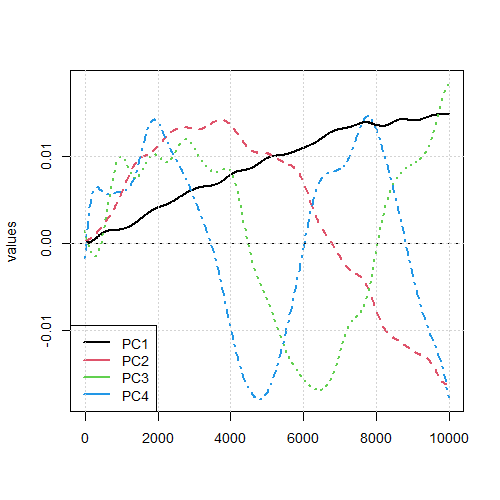

In [138]:
png("131_pri.png", width=500, height = 500) 
par(cex=1.2)

W_pca = pca.fd(W_fd$fd, nharm=4)
plot(W_pca$harmonics, lwd=2)

# x=seq(0,10000)
# y=0.00014142 * sqrt(x)
# lines(x=x, y=y)

colnames = paste0("PC", 1:ncol(W_pca$harmonics$coefs))
legend("bottomleft", legend=colnames, col=1:ncol(W_pca$harmonics$coefs), lwd=2)
grid()

cat(W_pca$varprop,"\n")
cat(cumsum(W_pca$varprop),"\n")

dev.off()
png_data <- readBin("131_pri.png", "raw", file.size("131_pri.png"))
display_png(png_data)

## 1.4 Analysis ofBOA stock returns

1行目： BOAという名前のデータフレームをcsvファイルから読み込みます。ファイルは、GitHubリポジトリからダウンロードされます。header=TRUEは、ファイルの最初の行にヘッダー（列名）があることを示し、sep = " "は列を区切るために空白を使用することを指定します。dec = ","は10進数のセパレーターがカンマであることを指定します。

2行目： BOAの日付列を取り出します。

3行目： BOAデータフレームから日付列を除きます。

4行目： BOAデータフレームを行列に変換します。

5行目： "08/26/2004"という日付の行を除外します。この行が外れ値であると判断されたためです。

6行目： BOA行列の行数（観測数）をnに、列数（変数の数）をJに代入します。

7行目： Timesは、0から6.5までの値をJ個の等間隔な区間に分割したベクトルを作成します。これは、後でBスプライン基底関数を評価するために使用されます。

In [78]:
BOA_data = read.csv(file="https://raw.githubusercontent.com/lidom/Teaching_Repo/master/stock_prices.csv", header=TRUE, sep=" ", dec=",")
head(BOA_data)

,date,price.09.30,price.09.31,price.09.32,price.09.33,price.09.34,price.09.35,price.09.36,price.09.37,price.09.38,...,price.15.50,price.15.51,price.15.52,price.15.53,price.15.54,price.15.55,price.15.56,price.15.57,price.15.58,price.15.59
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,04/09/1997,53.84375,53.84375,53.87500,53.87500,53.84375,53.87500,53.87500,53.90625,53.90625,...,53.21875,53.20312,53.18750,53.18750,53.18750,53.18750,53.21875,53.18750,53.18750,53.18750
2,04/10/1997,53.15625,53.12500,53.12500,53.06250,53.06250,53.00000,53.00000,53.06250,53.00000,...,52.81250,52.81250,52.81250,52.81250,52.81250,52.87500,52.87500,52.87500,52.87500,52.87500
3,04/11/1997,51.81250,51.81250,51.81250,51.81250,51.81250,51.81250,51.81250,51.81250,51.81250,...,51.00000,51.00000,51.00000,51.00000,50.93750,50.90625,50.84375,50.75000,50.78125,50.81250
4,04/14/1997,50.75000,50.75000,50.75000,50.75000,50.84375,50.81250,50.81250,50.84375,50.62500,...,51.87500,51.87500,51.81250,51.96875,52.06250,52.03125,52.03125,51.96875,51.96875,52.00000
5,04/15/1997,53.62500,53.62500,53.59375,53.53125,53.62500,53.56250,53.50000,53.56250,53.53125,...,53.28125,53.28125,53.25000,53.31250,53.34375,53.37500,53.31250,53.12500,53.03125,53.03125
6,04/16/1997,52.78125,52.78125,52.78125,52.78125,52.78125,52.71875,52.65625,52.59375,52.56250,...,52.03125,51.93750,51.84375,51.84375,51.81250,51.85938,51.90625,51.96875,51.96875,51.93750


In [80]:
tail(BOA_data)

,date,price.09.30,price.09.31,price.09.32,price.09.33,price.09.34,price.09.35,price.09.36,price.09.37,price.09.38,...,price.15.50,price.15.51,price.15.52,price.15.53,price.15.54,price.15.55,price.15.56,price.15.57,price.15.58,price.15.59
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2506,03/26/2007,51.635,51.630,51.6500,51.620,51.58500,51.605,51.580,51.555,51.550,...,51.575,51.555,51.540,51.530,51.53000,51.530,51.530,51.530,51.525,51.535
2507,03/27/2007,51.520,51.520,51.5350,51.525,51.52500,51.515,51.490,51.525,51.535,...,51.865,51.865,51.885,51.865,51.86500,51.830,51.850,51.840,51.825,51.820
2508,03/28/2007,51.435,51.435,51.4325,51.415,51.39500,51.370,51.345,51.335,51.315,...,50.760,50.760,50.760,50.785,50.78500,50.815,50.815,50.785,50.745,50.730
2509,03/29/2007,50.975,50.975,51.0900,51.135,51.13525,51.055,51.030,51.035,51.045,...,51.225,51.225,51.200,51.165,51.16000,51.190,51.200,51.210,51.200,51.180
2510,03/30/2007,51.160,51.200,51.2050,51.130,51.08500,51.085,51.080,51.075,51.075,...,51.020,50.980,50.990,51.015,50.97525,50.920,50.880,50.895,50.960,50.985
2511,04/02/2007,51.165,51.110,51.0600,50.940,50.86500,50.915,50.875,50.815,50.710,...,50.475,50.470,50.465,50.460,50.45500,50.460,50.470,50.475,50.470,50.450


In [85]:
dates = BOA_data$date
head(dates)

[1] "04/09/1997" "04/10/1997" "04/11/1997" "04/14/1997" "04/15/1997"
[6] "04/16/1997"

In [86]:
BOA = BOA_data[,-1]
head(BOA)

,price.09.30,price.09.31,price.09.32,price.09.33,price.09.34,price.09.35,price.09.36,price.09.37,price.09.38,price.09.39,...,price.15.50,price.15.51,price.15.52,price.15.53,price.15.54,price.15.55,price.15.56,price.15.57,price.15.58,price.15.59
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,53.84375,53.84375,53.87500,53.87500,53.84375,53.87500,53.87500,53.90625,53.90625,53.84375,...,53.21875,53.20312,53.18750,53.18750,53.18750,53.18750,53.21875,53.18750,53.18750,53.18750
2,53.15625,53.12500,53.12500,53.06250,53.06250,53.00000,53.00000,53.06250,53.00000,53.00000,...,52.81250,52.81250,52.81250,52.81250,52.81250,52.87500,52.87500,52.87500,52.87500,52.87500
3,51.81250,51.81250,51.81250,51.81250,51.81250,51.81250,51.81250,51.81250,51.81250,51.81250,...,51.00000,51.00000,51.00000,51.00000,50.93750,50.90625,50.84375,50.75000,50.78125,50.81250
4,50.75000,50.75000,50.75000,50.75000,50.84375,50.81250,50.81250,50.84375,50.62500,50.62500,...,51.87500,51.87500,51.81250,51.96875,52.06250,52.03125,52.03125,51.96875,51.96875,52.00000
5,53.62500,53.62500,53.59375,53.53125,53.62500,53.56250,53.50000,53.56250,53.53125,53.53125,...,53.28125,53.28125,53.25000,53.31250,53.34375,53.37500,53.31250,53.12500,53.03125,53.03125
6,52.78125,52.78125,52.78125,52.78125,52.78125,52.71875,52.65625,52.59375,52.56250,52.59375,...,52.03125,51.93750,51.84375,51.84375,51.81250,51.85938,51.90625,51.96875,51.96875,51.93750


In [87]:
BOA = data.matrix(BOA)
head(BOA)

price.09.30,price.09.31,price.09.32,price.09.33,price.09.34,price.09.35,price.09.36,price.09.37,price.09.38,price.09.39,...,price.15.50,price.15.51,price.15.52,price.15.53,price.15.54,price.15.55,price.15.56,price.15.57,price.15.58,price.15.59
53.84375,53.84375,53.87500,53.87500,53.84375,53.87500,53.87500,53.90625,53.90625,53.84375,...,53.21875,53.20312,53.18750,53.18750,53.18750,53.18750,53.21875,53.18750,53.18750,53.18750
53.15625,53.12500,53.12500,53.06250,53.06250,53.00000,53.00000,53.06250,53.00000,53.00000,...,52.81250,52.81250,52.81250,52.81250,52.81250,52.87500,52.87500,52.87500,52.87500,52.87500
51.81250,51.81250,51.81250,51.81250,51.81250,51.81250,51.81250,51.81250,51.81250,51.81250,...,51.00000,51.00000,51.00000,51.00000,50.93750,50.90625,50.84375,50.75000,50.78125,50.81250
50.75000,50.75000,50.75000,50.75000,50.84375,50.81250,50.81250,50.84375,50.62500,50.62500,...,51.87500,51.87500,51.81250,51.96875,52.06250,52.03125,52.03125,51.96875,51.96875,52.00000
53.62500,53.62500,53.59375,53.53125,53.62500,53.56250,53.50000,53.56250,53.53125,53.53125,...,53.28125,53.28125,53.25000,53.31250,53.34375,53.37500,53.31250,53.12500,53.03125,53.03125
52.78125,52.78125,52.78125,52.78125,52.78125,52.71875,52.65625,52.59375,52.56250,52.59375,...,52.03125,51.93750,51.84375,51.84375,51.81250,51.85938,51.90625,51.96875,51.96875,51.93750


In [88]:
BOA = BOA[-which(dates=="08/26/2004"),] # Outlier

In [89]:
n = dim(BOA)[1]
j = dim(BOA)[2]
cat(n,"\n",j)

2510 
 390

In [90]:
times = seq(0, 6.5, length=j)
head(times)

[1] 0.00000000 0.01670951 0.03341902 0.05012853 0.06683805 0.08354756

---
8行目： BOAの累積対数収益率関数を計算します。ここで、対数変換を適用することにより、収益率の乗算が対数の加算に置き換わります。そして、最初の観測値に対する対数変換値で各列を補正し、各列を基準化します。

9行目： create.bspline.basis関数を使用して、0から6.5までの区間で定義されるBスプライン基底関数を作成します。nbは基底関数の数を指定します。ここでは、200個の基底関数が作成されます。

10行目： Data2fd関数を使用して、データセットを関数データオブジェクトに変換します。関数データオブジェクトは、関数の値と基底関数の組み合わせとして表されます。この場合、列方向に転置された累積対数収益率行列が関数データオブジェクトの値になり、Bスプライン基底関数が基底関数になります。

In [91]:
# Cumulative log-return functions
log_BOA = log(BOA) - matrix(log(BOA)[,1], nrow=n, ncol=j)

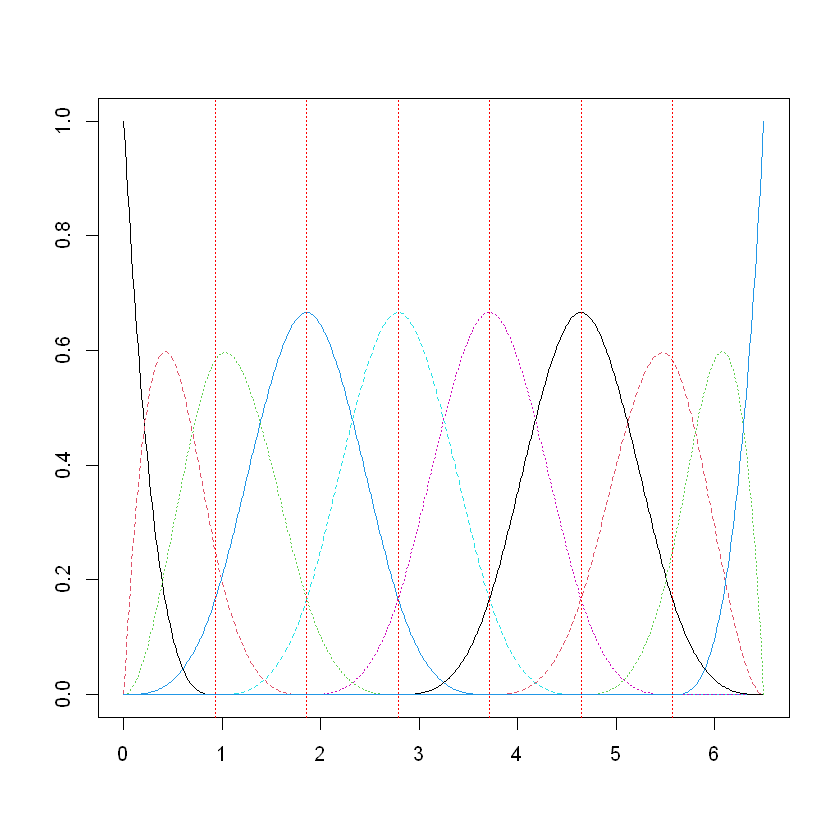

In [92]:
bspl_basis = create.bspline.basis(rangeval=c(0, 6.5), nord=4, nb=10)
plot(bspl_basis)

# B-spline basis functions
bspl_basis = create.bspline.basis(rangeval=c(0, 6.5), nord=4, nb=200)

[1] "done"

png 
  2

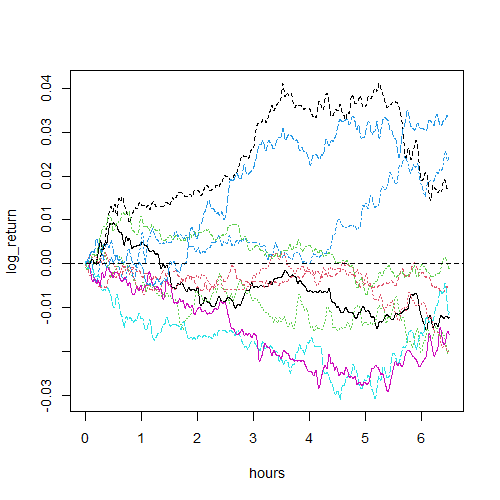

In [95]:
png("141_logre.png", width=500, height = 500) 
par(cex=1.2)

# Cumulative log-return functions (with basis functions)
log_BOA_fd <- Data2fd(times, t(log_BOA), basisobj = bspl_basis)
plot(log_BOA_fd[1:10],xlab="hours",ylab="log_return",lwd=1.5)

dev.off()
png_data <- readBin("141_logre.png", "raw", file.size("141_logre.png"))
display_png(png_data)

[1] "done"

[1] "done"

[1] "done"

png 
  2

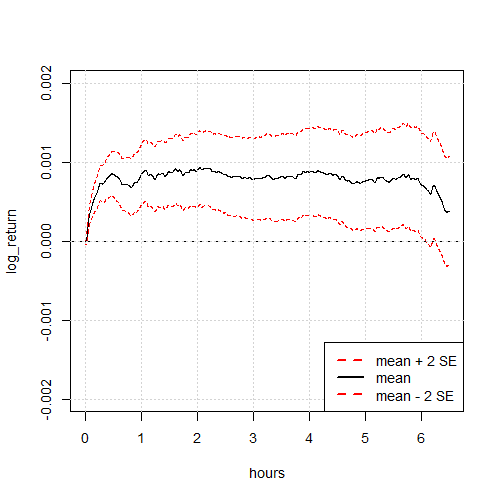

In [102]:
png("142_mean_logre.png", width=500, height = 500) 
par(cex=1.2)

muhat          <- mean.fd(log_BOA_fd)
sdhat          <- sd.fd(log_BOA_fd)
SE_hat_U       <- fd(basisobj=bspl_basis) # create upper CI bound
SE_hat_L       <- fd(basisobj=bspl_basis) # create lower CI bound

SE_hat_U$coefs <-  2*sdhat$coefs/sqrt(n) + muhat$coefs
SE_hat_L$coefs <- -2*sdhat$coefs/sqrt(n) + muhat$coefs 

plot.fd(SE_hat_U,ylim=c(-0.002,0.002),col='red',lty=2,xlab="hours",ylab="log_return")
plot.fd(SE_hat_L,add=TRUE,col='red',lty=2)
plot.fd(muhat,add=TRUE)
grid()

legend("bottomright", legend=c("mean + 2 SE", "mean", "mean - 2 SE"), col=c("red", "black", "red"), lty=c(2,1,2), lwd=2)

dev.off()
png_data <- readBin("142_mean_logre.png", "raw", file.size("142_mean_logre.png"))
display_png(png_data)

[1] "done"

0.8512517 0.07256828 0.02523702 0.01323323 
0.8512517 0.92382 0.949057 0.9622902 


png 
  2

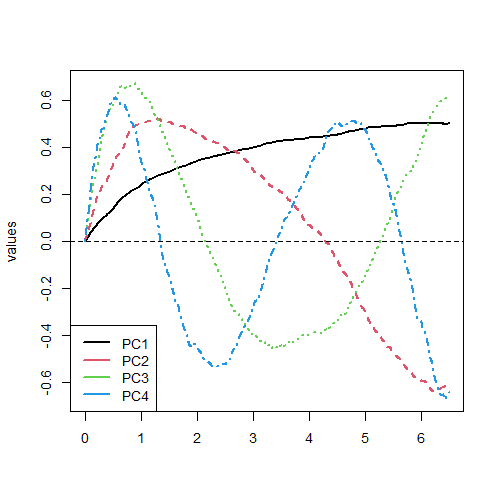

In [104]:
log_BOA_pca = pca.fd(log_BOA_fd, nharm=4)

png("143_pri.png", width=500, height = 500) 
par(cex=1.2)

plot(log_BOA_pca$harmonics, lwd=2)

colnames = paste0("PC", 1:ncol(log_BOA_pca$harmonics$coefs))
legend("bottomleft", legend=colnames, col=1:ncol(log_BOA_pca$harmonics$coefs), lwd=2)

cat(log_BOA_pca$varprop,"\n")
cat(cumsum(log_BOA_pca$varprop),"\n")

dev.off()
png_data <- readBin("143_pri.png", "raw", file.size("143_pri.png"))
display_png(png_data)

In [108]:
xx = seq(0,1,len=dim(BOA)[2]) 

png 
  2

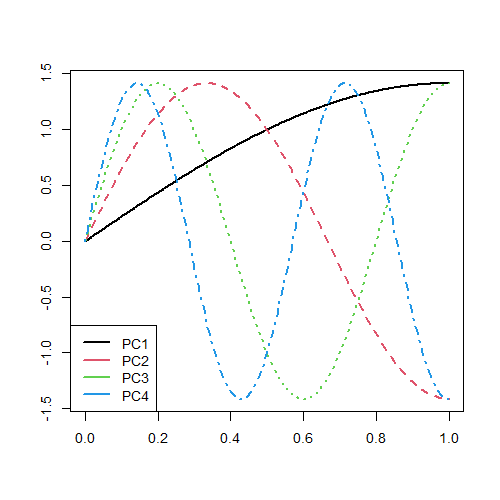

In [118]:
log_BOA_pca  <- pca.fd(log_BOA_fd, nharm=4)

# Eigenfunctions of BM process
efwp_fun      <- function(x, k=1){sqrt(2)*sin((k-1/2)*pi*x)}

# integrate(function(x){(efwp_fun(x,k=1))^2}, lower = 0, upper = 1)
EFWP_mat      <- cbind(efwp_fun(x=xx,k=1), efwp_fun(x=xx,k=2), efwp_fun(x=xx,k=3), efwp_fun(x=xx,k=4))


# plot
png("144_sim.png", width=500, height = 500) 
par(cex=1.2)
# plot(log_BOA_pca$harmonics, main="Estimated Eigenfunctions of\nCumulative Return Functions", xlab="Trading Hours", ylab="")
# matplot(x = xx, y=EFWP_mat, type="l",  main="True Eigenfunctions of\nBrownian Motion",ylab="",xlab="")
matplot(x = xx, y=EFWP_mat, type="l",ylab="",xlab="", lwd=2)
legend("bottomleft", legend=colnames, col=1:ncol(log_BOA_pca$harmonics$coefs), lwd=2)
dev.off()
png_data <- readBin("144_sim.png", "raw", file.size("144_sim.png"))
display_png(png_data)

# 1.5 Diffusion tensor imaging

In [207]:
library(refund)
data(DTI)

In [142]:
str(DTI)

'data.frame':	382 obs. of  9 variables:
 $ ID        : num  1001 1002 1003 1004 1005 ...
 $ visit     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ visit.time: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Nscans    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ case      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ sex       : Factor w/ 2 levels "male","female": 2 2 1 1 1 1 1 1 1 1 ...
 $ pasat     : int  NA NA NA NA NA NA NA NA NA NA ...
 $ cca       : num [1:382, 1:93] 0.491 0.472 0.502 0.402 0.402 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:382] "1001_1" "1002_1" "1003_1" "1004_1" ...
  .. ..$ : chr [1:93] "cca_1" "cca_2" "cca_3" "cca_4" ...
 $ rcst      : num [1:382, 1:55] 0.257 NaN NaN 0.508 NaN ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:382] "1001_1" "1002_1" "1003_1" "1004_1" ...
  .. ..$ : chr [1:55] "rcst_1" "rcst_2" "rcst_3" "rcst_4" ...


In [144]:
head(DTI)

,ID,visit,visit.time,Nscans,case,sex,pasat,cca,rcst
,<dbl>,<int>,<int>,<int>,<dbl>,<fct>,<int>,"<dbl[,93]>","<dbl[,55]>"
1,1001,1,0,1,0,female,NA,"0.4909345, 0.5168018, 0.5356539, 0.5553587, 0.5927610, 0.6326935, 0.6503855, 0.6556130, 0.6493701, 0.6378739, 0.6286463, 0.6249649, 0.6164504, 0.6113308, 0.5846939, 0.5385250, 0.4950826, 0.4952554, 0.4888065, 0.4825257, 0.4741349, 0.4898970, 0.4928850, 0.4911993, 0.4932295, 0.5043283, 0.5092916, 0.5059736, 0.5065265, 0.5050361, 0.5066120, 0.5028980, 0.5073618, 0.5081009, 0.5247082, 0.5252773, 0.5235987, 0.5243505, 0.5254499, 0.5306318, 0.5338370, 0.5296567, 0.5318295, 0.5296125, 0.5331821, 0.5288681, 0.5307563, 0.5416137, 0.5452572, 0.5474421, 0.5441192, 0.5347157, 0.5279458, 0.5259310, 0.5175913, 0.5234301, 0.5217467, 0.5250109, 0.5195787, 0.5092322, 0.4879112, 0.4754212, 0.4655447, 0.4513198, 0.4394037, 0.4379589, 0.4339554, 0.4245345, 0.4179126, 0.4184430, 0.4117148, 0.4191516, 0.4376579, 0.4528836, 0.4735466, 0.4922851, 0.4976906, 0.5111858, 0.5357575, 0.5380131, 0.5387591, 0.5385923, 0.5431367, 0.5632726, 0.5903442, 0.5812517, 0.5768193, 0.5916373, 0.6047983, 0.6118206, 0.6072471, 0.5974377, 0.5904773","0.2572899, 0.4539093, 0.3974958, 0.3915055, 0.4181097, 0.4165069, 0.4357346, 0.4540771, 0.4841092, 0.4536247, 0.5051717, 0.5190712, 0.5807487, 0.5661553, 0.5833364, 0.5603094, 0.5345778, 0.5623530, 0.6101868, 0.6075959, 0.6240531, 0.7011781, 0.7701491, 0.7426501, 0.6603320, 0.6868709, 0.6910859, 0.7008225, 0.7090975, 0.7170979, 0.7262979, 0.7284356, 0.7156681, 0.6972388, 0.6685733, 0.6328179, 0.5990850, 0.5801229, 0.5738956, 0.5527057, 0.5058014, 0.4450996, 0.3727109, 0.3259199, 0.3151132, 0.3231551, 0.3733820, 0.4597227, 0.5190081, 0.5084256, 0.5013133, 0.4828025, 0.4709835, 0.4287402, 0.4557126"
2,1002,1,0,1,0,female,NA,"0.4721627, 0.4868219, 0.5022577, 0.5233635, 0.5524401, 0.5872003, 0.5970120, 0.6026607, 0.5922767, 0.5791859, 0.5714253, 0.5640410, 0.5488670, 0.5148614, 0.4690637, 0.4654895, 0.4945643, 0.5027834, 0.5290919, 0.5236951, 0.5009698, 0.5070110, 0.5206877, 0.5153710, 0.5076689, 0.5017398, 0.4982807, 0.4993118, 0.4869815, 0.4797477, 0.4787024, 0.4760067, 0.4795855, 0.4781358, 0.4784981, 0.4869597, 0.5065917, 0.5220251, 0.5445128, 0.5510683, 0.5453291, 0.5442394, 0.5345523, 0.5294878, 0.5287803, 0.5116867, 0.4984125, 0.4872645, 0.4818140, 0.4791778, 0.4769786, 0.4805995, 0.4742046, 0.4575991, 0.4526461, 0.4501681, 0.4521089, 0.4581485, 0.4618510, 0.4685422, 0.4699607, 0.4765646, 0.4666116, 0.4626807, 0.4690559, 0.4767521, 0.4787997, 0.4795087, 0.4818308, 0.4887047, 0.4940524, 0.5075587, 0.5209661, 0.5285265, 0.5200662, 0.5465158, 0.5642346, 0.5570745, 0.5766790, 0.5894610, 0.5750992, 0.5891457, 0.6038479, 0.6269639, 0.6265557, 0.6024469, 0.5859679, 0.5778964, 0.5849247, 0.6037823, 0.6068070, 0.5946983, 0.5802742","NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, 0.4427903, 0.4799762, 0.4842274, 0.5239656, 0.5594616, 0.6047412, 0.6070987, 0.6534204, 0.6910838, 0.6663648, 0.7453985, 0.7552195, 0.7129236, 0.6598093, 0.6647575, 0.7498987, 0.7653176, 0.7016240, 0.7160461, 0.7138011, 0.6769029, 0.6252532, 0.6085429, 0.5917788, 0.5692703, 0.5564034, 0.5408012, 0.4996903, 0.4079949, 0.3440148, 0.3113530, 0.3197576, 0.3746915, 0.4106683, 0.4513569, 0.4839963, 0.4920049, 0.5002135, 0.5298003, 0.5132566, 0.4892501, 0.5183189, 0.5100032"
3,1003,1,0,1,0,male,NA,"0.5023738, 0.5136516, 0.5392542, 0.5742101, 0.6031339, 0.6335913, 0.6357541, 0.6350799, 0.6201638, 0.6086281, 0.5910287, 0.5680196, 0.5433478, 0.5134790, 0.4871413, 0.4840465, 0.4948048, 0.4906371, 0.4877579, 0.4742280, 0.4738927, 0.4807152, 0.4739193, 0.4670146, 0.4849994, 0.4870079, 0.4788655, 0.4700110, 0.4724737, 0.4824247, 0.4725281, 0.4758382, 0.4773336, 0.4825085, 0.4907332, 0.4852776, 0.4835870, 0.4742337, 0.4742299, 0.4688590, 0.4722176, 0.4788008, 0.4803440, 0.4789484, 0.4802429, 0.4883517, 0.4993035, 0.5062250, 0.5014466, 0.4911293, 0.4988815, 0.5020438, 0.5023207, 0.4976664, 0.4900235, 0.4861588, 0

In [208]:
y = DTI$cca
y = y[-c(126, 130, 131, 125, 319, 321),] # missing values

In [209]:
dim(y)

[1] 376  93

In [210]:
N = dim(y)[1]
M = dim(y)[2]

In [217]:
argvals = seq(0,1,length=M)
data_basis = create.bspline.basis(c(0,1), nbasis=10)
y_fd = Data2fd(argvals, t(y), data_basis)

In [218]:
colnames = c(
    "sample",
    "mean + 3 SD",
#     "mean + 2 SD",
#     "mean + 1 SD",
    "mean",
#     "mean - 1 SD",
#     "mean - 2 SD",
    "mean - 3 SD")

[1] "done"

png 
  2

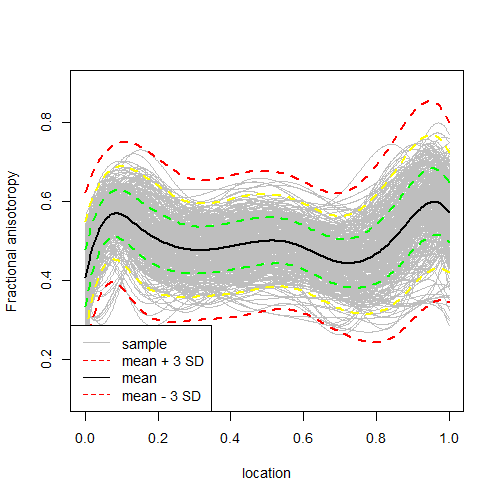

In [220]:
png("151_dti.png", width=500, height = 500) 
par(cex=1.2)

plot(y_fd, lty=1, col="gray", xlab="location", ylab="Fractional anisotoropy", ylim=c(0.1, .9))
lines(mean.fd(y_fd), lwd=2)
lines(mean.fd(y_fd) + std.fd(y_fd), lwd=2, lty=2, col="green")
lines(mean.fd(y_fd) + 2*std.fd(y_fd), lwd=2, lty=2, col="yellow")
lines(mean.fd(y_fd) + 3*std.fd(y_fd), lwd=2, lty=2, col="red")
lines(mean.fd(y_fd) - std.fd(y_fd), lwd=2, lty=2, col="green")
lines(mean.fd(y_fd) - 2*std.fd(y_fd), lwd=2, lty=2, col="yellow")
lines(mean.fd(y_fd) - 3*std.fd(y_fd), lwd=2, lty=2, col="red")
legend("bottomleft", legend=colnames, col=c("gray", "red", 1,  "red"), lty=c(1, 2, 1, 2))
# legend("bottomleft", legend=colnames, col=c("gray", "red", "yellow", "green", 1, "green", "green", "red"), lty=c(1,2,2,2,1,2,2,2))

dev.off()
png_data <- readBin("151_dti.png", "raw", file.size("151_dti.png"))
display_png(png_data)

## 1.6 Problems

### 1.1 The pinch is a dataset included in the fda package. It consists of 151 measurements of pinch force for 20 replications (curves).

(a) Convert the pinch data to functional objects using 15 B-splines of order
four (cubic splines) and plot the 20 smoothed curves on one graph.

(b) Calculate the pointwise mean and SD and add them to the plot.

(c) Graph the perspective and contour plots of the sample covariance function ˆc(t, s) of the pinch curves.

(d) Graph the first four EFPC’s of the pinch data. How many components
do you need to explain 90% of variation?


In [5]:
head(pinch)

-0.068,0.078,-0.148,-0.065,-0.291,-0.041,-0.059,-0.102,-0.172,-0.224,0.002,-0.032,-0.111,-0.087,0.087,-0.019,-0.141,-0.032,-0.209,-0.102
-0.090,-0.032,-0.090,0.045,-0.193,-0.087,0.115,0.005,-0.083,0.017,-0.123,0.042,-0.282,-0.410,0.002,-0.535,0.081,-0.038,-0.038,-0.053
0.100,-0.053,-0.053,-0.093,-0.273,-0.004,-0.032,-0.160,-0.120,-0.184,-0.135,-0.056,0.023,-0.026,0.020,-0.050,0.463,-0.169,-0.187,-0.141
-0.138,0.029,-0.050,-0.010,-0.196,-0.080,-0.132,-0.145,0.023,-0.096,-0.071,-0.038,0.005,-0.007,-0.111,0.002,-0.187,-0.114,-0.120,-0.068
-0.053,-0.026,-0.047,0.072,-0.175,-0.056,0.054,-0.218,-0.376,-0.279,0.014,-0.059,-0.047,0.390,0.075,0.451,-0.221,-0.102,-0.645,-0.019
-0.245,-0.004,-0.047,-0.035,-0.135,0.441,-0.090,-0.053,-0.056,-0.111,-0.013,0.020,-0.068,-0.047,-0.059,0.036,-0.218,0.032,-0.141,0.066


In [6]:
dim(pinch)

[1] 151  20

In [7]:
min(pinch)

[1] -0.834

In [31]:
N = dim(pinch)[2] # 20 
J = dim(pinch)[1] # 151
t = seq(0, J-1, 1)

In [32]:
length(pinch[,1])
length(t)

[1] 151

[1] 151

png 
  2

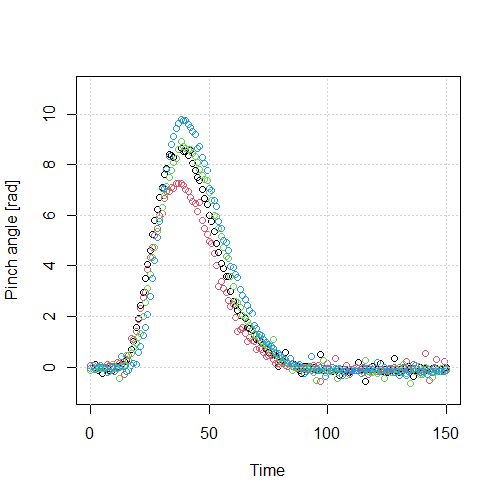

In [35]:
png("1611_pinch_raw.png", width=500, height = 500) 
par(cex=1.3)

plot(t, pinch[,1], type = "p", xlim=c(0,150), ylim = c(-1, 11), xlab = "Time", ylab = "Pinch angle [rad]", col=1)

for (n in 2:4) {
    lines(t, pinch[,n], col = n, type = "p")
}
grid()

dev.off()
png_data <- readBin("1611_pinch_raw.png", "raw", file.size("1611_pinch_raw.png"))
display_png(png_data)

[1] "done"

png 
  2

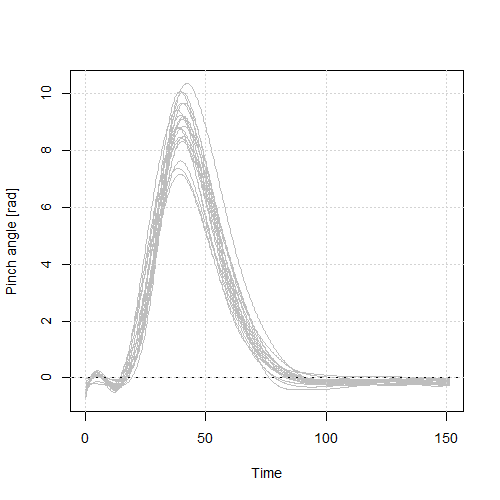

In [36]:
png("1612_pinch_smo.png", width=500, height = 500) 
par(cex=1.2)

b_spl_15 = create.bspline.basis(rangeval=c(0,J), nbasis=15, norder=4)
pinch_fd = smooth.basis(y=pinch, fdParobj=b_spl_15)

plot(pinch_fd, xlab = "Time", ylab = "Pinch angle [rad]", col="gray", lty=1)
grid()

dev.off()
png_data <- readBin("1612_pinch_smo.png", "raw", file.size("1612_pinch_smo.png"))
display_png(png_data)

[1] "done"

png 
  2

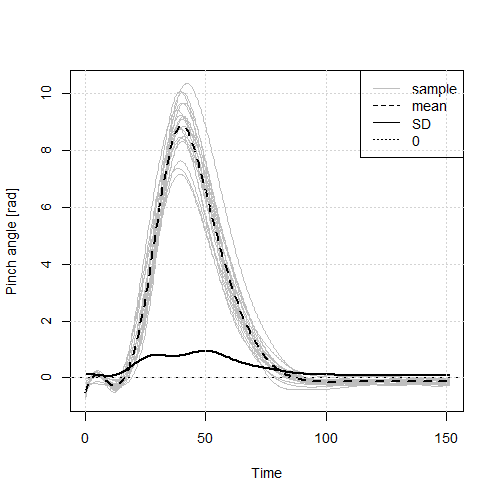

In [210]:
png("1613_pinch_mean.png", width=500, height = 500) 
par(cex=1.2)

pinch_mean = mean.fd(pinch_fd$fd)
pinch_sd = sd.fd(pinch_fd$fd)

plot(pinch_fd, xlab = "Time", ylab = "Pinch angle [rad]", col="gray", lty=1)
lines(pinch_sd, lwd=2)
lines(pinch_mean, lwd=2, lty=2)
legend("topright", legend=c("sample", "mean", "SD","0"), lty=c("solid",  "dashed", "solid", "dotted"), col=c("gray", "black", "black", "black"))
grid()

dev.off()
png_data <- readBin("1613_pinch_mean.png", "raw", file.size("1613_pinch_mean.png"))
display_png(png_data)

png 
  2

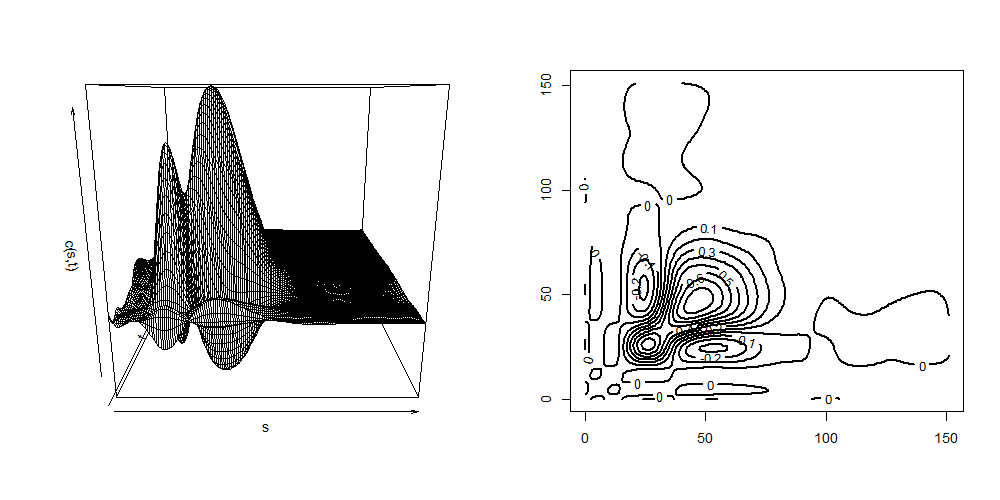

In [45]:
png("1614_cov.png", width=1000, height = 500) 
par(mfrow=c(1,2), cex=1.2)
pinch_cov = var.fd(pinch_fd$fd)
grid=seq(0, 151, by = 1)
pinch_cov_mat = eval.bifd(grid, grid, pinch_cov)
persp(grid, grid, pinch_cov_mat, xlab="s",
        ylab="t", zlab="c(s,t)"
)
contour(grid, grid, pinch_cov_mat, lwd=2, labcex=1.1)

dev.off()
png_data <- readBin("1614_cov.png", "raw", file.size("1614_cov.png"))
display_png(png_data)

png 
  2

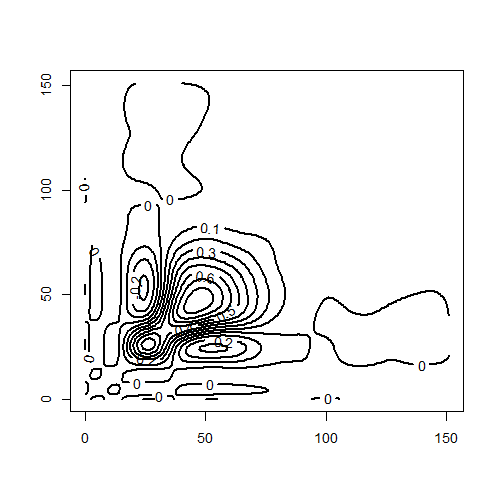

In [48]:
png("1615_con.png", width=500, height = 500) 
par(cex=1.2)
pinch_cov = var.fd(pinch_fd$fd)
grid=seq(0, 151, by = 1)
pinch_cov_mat = eval.bifd(grid, grid, pinch_cov)

contour(grid, grid, pinch_cov_mat, lwd=2, labcex=1.2)

dev.off()
png_data <- readBin("1615_con.png", "raw", file.size("1615_con.png"))
display_png(png_data)

[1] "done"

0.6718831 0.2476793 0.04669787 0.01957213 
0.6718831 0.9195624 0.9662603 0.9858324 


png 
  2

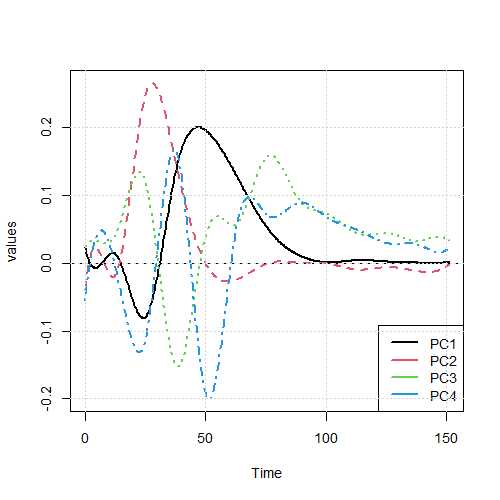

In [50]:
pinch_pca = pca.fd(pinch_fd$fd, nharm=4)

png("1615_pri.png", width=500, height = 500) 
par(cex=1.2)

plot(pinch_pca$harmonics, lwd=2, xlab = "Time")

colnames = paste0("PC", 1:ncol(pinch_pca$harmonics$coefs))
legend("bottomright", legend=colnames, col=1:ncol(pinch_pca$harmonics$coefs), lwd=2)
grid()

cat(pinch_pca$varprop,"\n")
cat(cumsum(pinch_pca$varprop),"\n")

dev.off()
png_data <- readBin("1615_pri.png", "raw", file.size("1615_pri.png"))
display_png(png_data)

# 1.6-5 Matern covariance

In [172]:
matern_cov = function(h, rho, nu, sigma){
    nu_half = nu * 0.5
    sqrt_two_nu = sqrt(2*nu)
    u = sqrt_two_nu / rho * h
    k = besselK(u, nu_half)
    cov = sigma**2 / (gamma(nu) * (2**(nu-1))) * (u**nu) * k * u
    return(cov)
}

In [191]:
nu_list

[1] 0.5 2.0 4.0

b

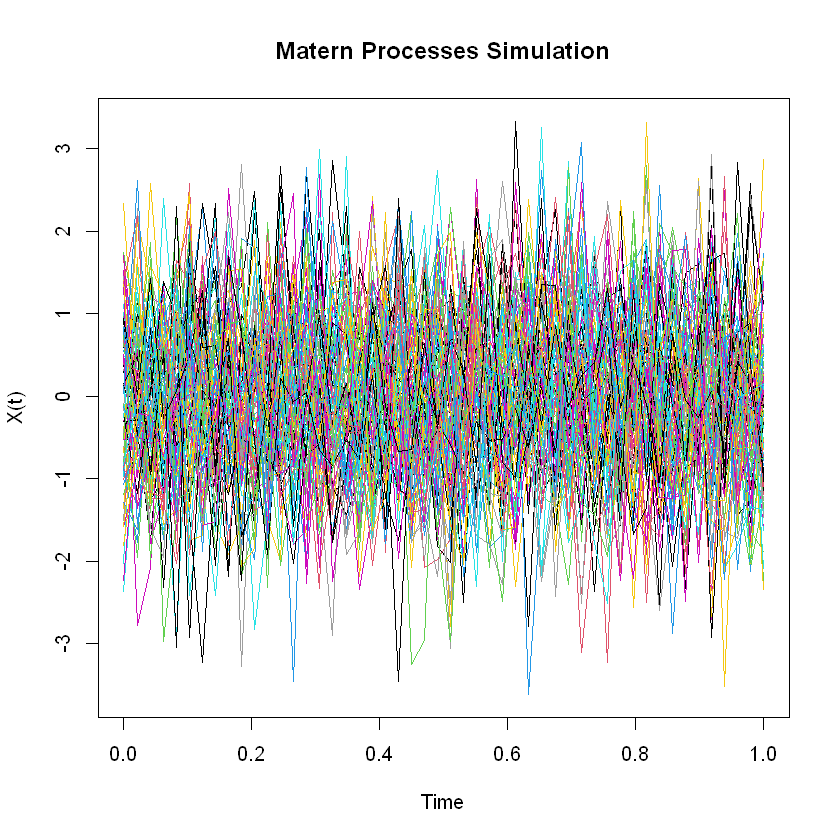

0.7400814 0.02451837 0.02010267 0.01776011 
0.7400814 0.7645998 0.7847024 0.8024625 


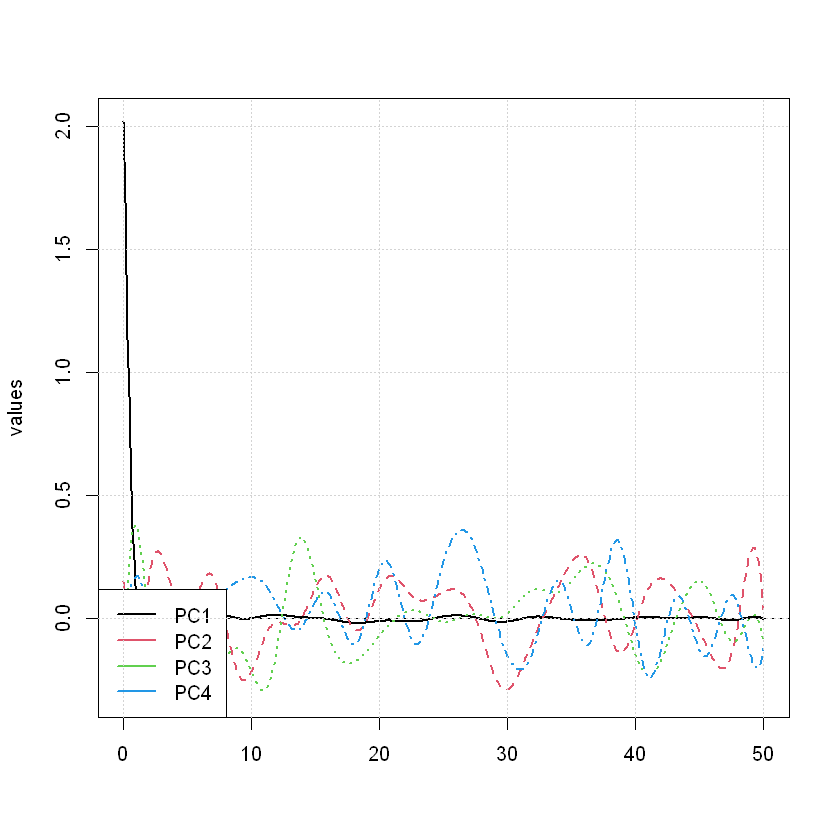

b

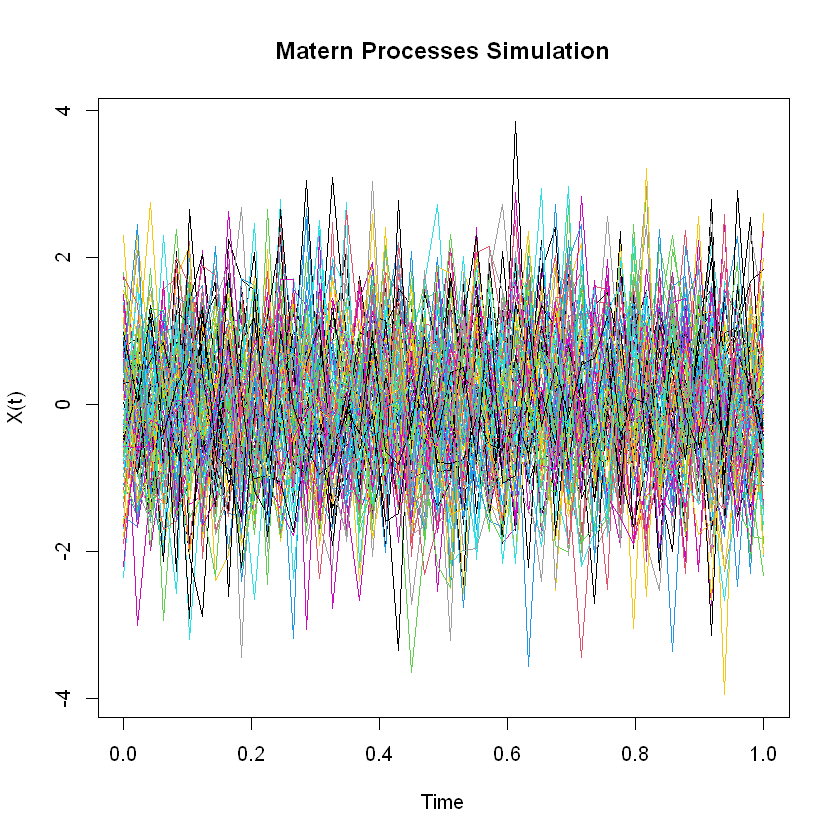

0.7502781 0.02323131 0.01871936 0.01817041 
0.7502781 0.7735094 0.7922287 0.8103991 


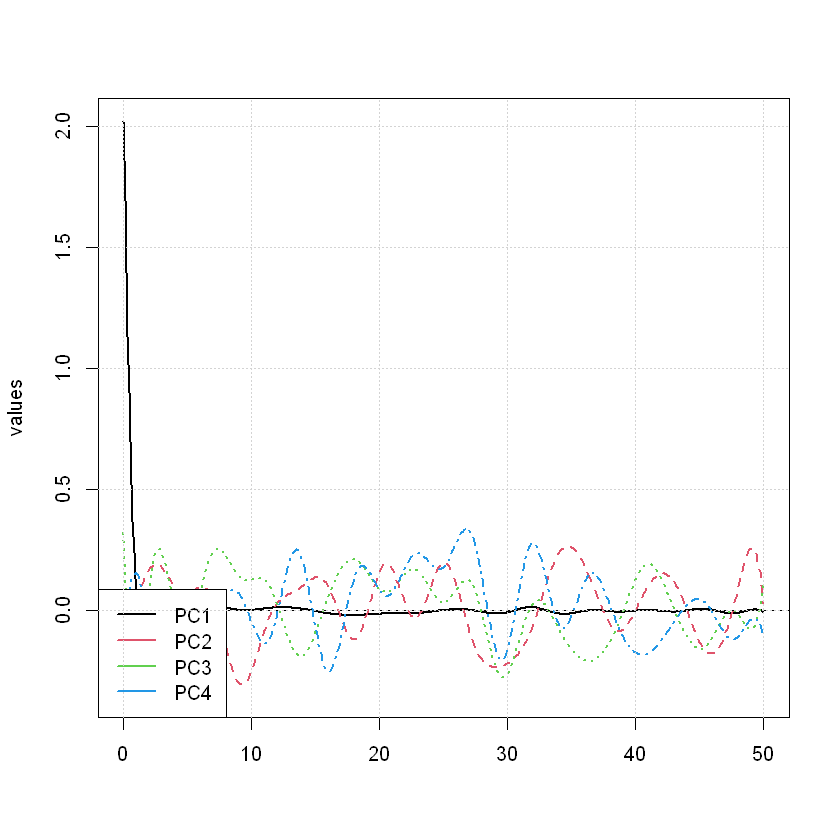

b

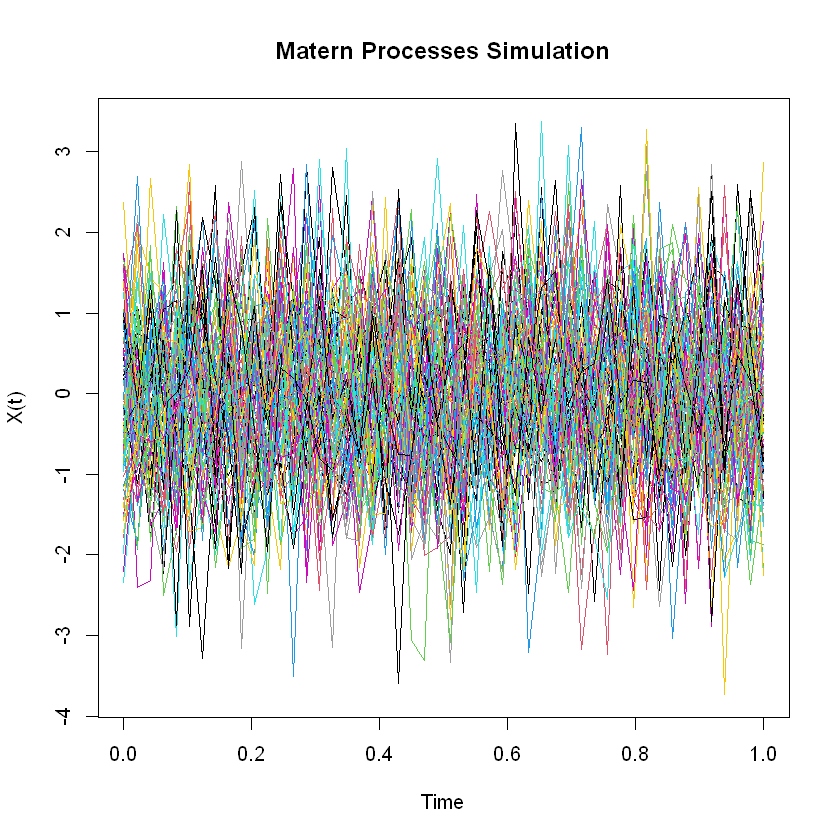

0.7307977 0.02537652 0.02080533 0.0183957 
0.7307977 0.7561743 0.7769796 0.7953753 


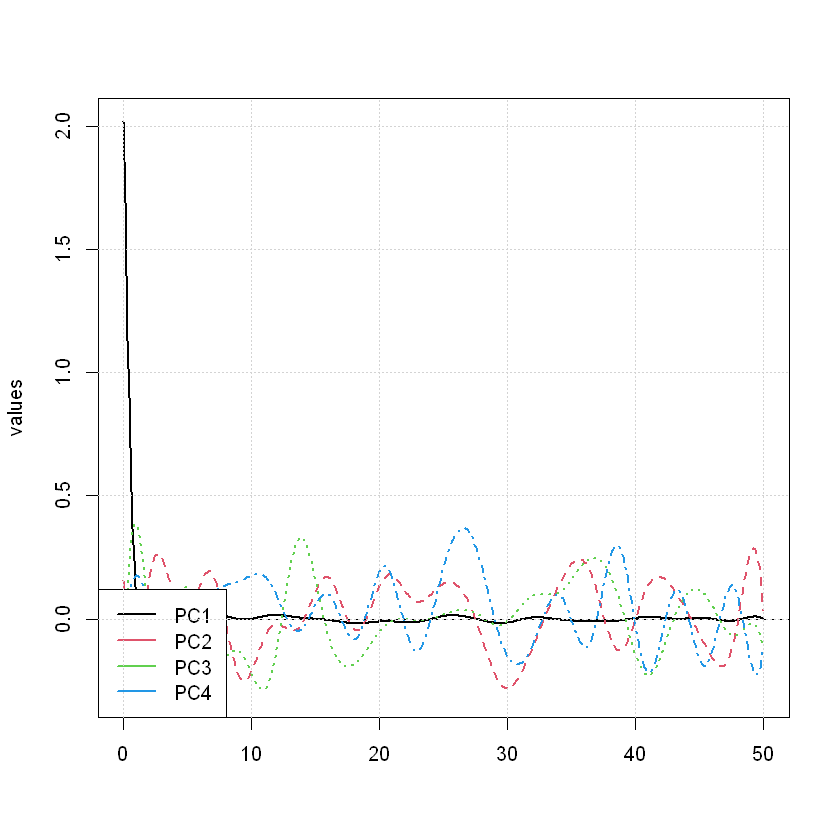

In [205]:
N = 100
n = 50
nu_list = c(0.5 , 2 , 4)
sigma = 1
rho = 1
t = seq(0, 50) 



for (nu in nu_list){
    set.seed(123)
    C_mat = matrix(0, ncol=n, nrow=n)
    for (i in 1:n) {
      for (j in 1:n) {
          if (i==j){
              C_mat[i, j] = 1
          } else{          
              C_mat[i, j] = matern_cov(abs(t[i] - t[j]), rho, nu, sigma)
          }
      }
    }

    L_mat = qr.Q(qr(C_mat))
    Z = matrix(rnorm(n * 100), nrow = n, ncol = 100)

    X_mat = t(L_mat) %*% Z
    
    matplot(t_grid, X_mat, type = "l", lty = 1, col = 1:100, xlab = "Time", ylab = "X(t)", main = "Matern Processes Simulation")
    cat("b")
    B25_basis = create.bspline.basis(rangeval=c(0,50), nbasis=25)
    C_fd = smooth.basis(y=X_mat, fdParobj=B25_basis)

    C_pca = pca.fd(C_fd$fd, nharm=4)
    plot(C_pca$harmonics, lwd=2)

    colnames = paste0("PC", 1:ncol(C_pca$harmonics$coefs))
    legend("bottomleft", legend=colnames, col=1:ncol(C_pca$harmonics$coefs), lwd=2)
    grid()

    cat(C_pca$varprop,"\n")
    cat(cumsum(C_pca$varprop),"\n")
}

[1] "done"

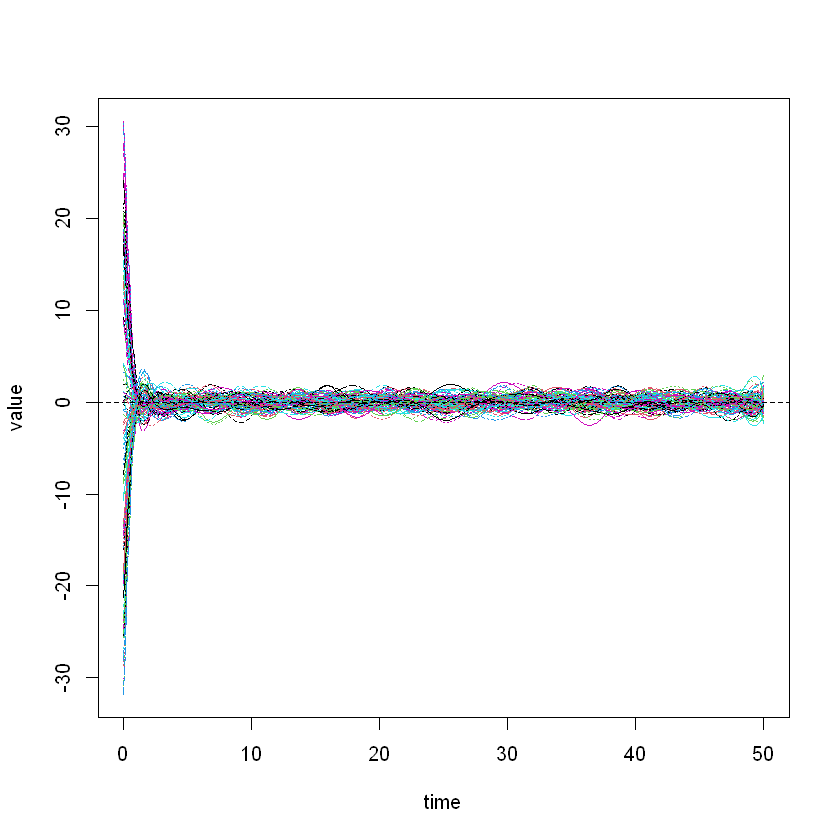

In [206]:
B25_basis = create.bspline.basis(rangeval=c(0,50), nbasis=25)
C_fd = smooth.basis(y=X_mat, fdParobj=B25_basis)
plot(C_fd)

[1] "done"

0.7418648 0.02253539 0.01960397 0.01803458 
0.7418648 0.7644002 0.7840042 0.8020387 


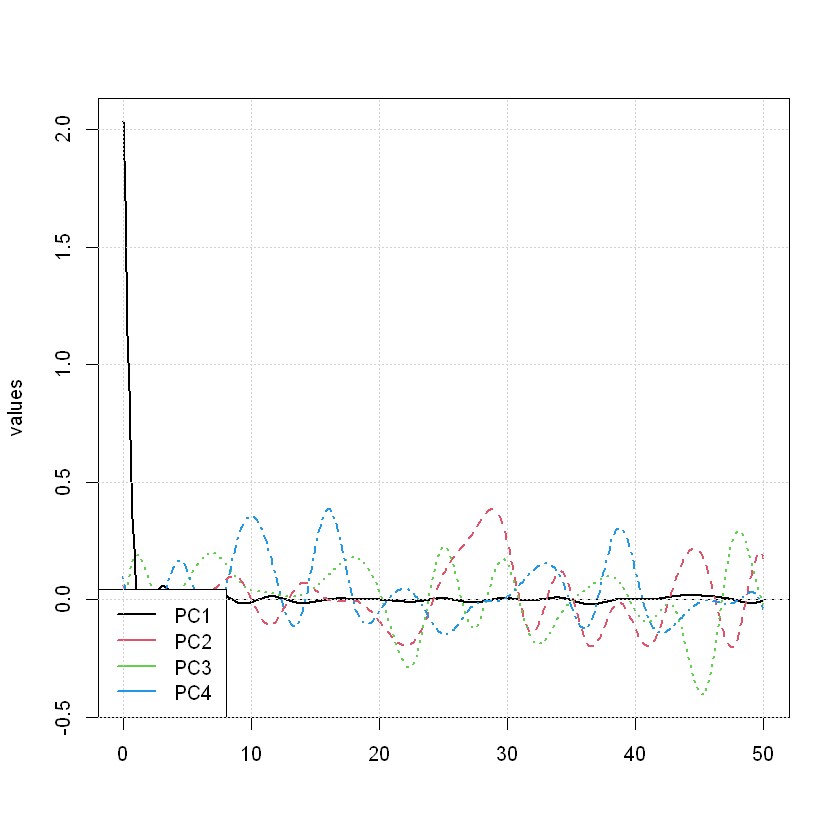

In [203]:
# png("131_pri.png", width=500, height = 500) 
# par(cex=1.2)

B25_basis = create.bspline.basis(rangeval=c(0,50), nbasis=25)
C_fd = smooth.basis(y=X_mat, fdParobj=B25_basis)

C_pca = pca.fd(C_fd$fd, nharm=4)
plot(C_pca$harmonics, lwd=2)

colnames = paste0("PC", 1:ncol(C_pca$harmonics$coefs))
legend("bottomleft", legend=colnames, col=1:ncol(C_pca$harmonics$coefs), lwd=2)
grid()

cat(C_pca$varprop,"\n")
cat(cumsum(C_pca$varprop),"\n")

# dev.off()
# png_data <- readBin("131_pri.png", "raw", file.size("131_pri.png"))
# display_png(png_data)

In [ ]:
B25_basis = create.bspline.basis(rangeval=c(0,10000), nbasis=25)
W_fd = smooth.basis(y=W_mat, fdParobj=B25_basis)

In [ ]:
png("131_pri.png", width=500, height = 500) 
par(cex=1.2)

W_pca = pca.fd(W_fd$fd, nharm=4)
plot(W_pca$harmonics, lwd=2)

# x=seq(0,10000)
# y=0.00014142 * sqrt(x)
# lines(x=x, y=y)

colnames = paste0("PC", 1:ncol(W_pca$harmonics$coefs))
legend("bottomleft", legend=colnames, col=1:ncol(W_pca$harmonics$coefs), lwd=2)
grid()

cat(W_pca$varprop,"\n")
cat(cumsum(W_pca$varprop),"\n")

dev.off()
png_data <- readBin("131_pri.png", "raw", file.size("131_pri.png"))
display_png(png_data)

In [194]:
X_mat

-2.0067136902,-0.08724871,1.03616178,0.3311049432,-1.513426459,0.371419488,0.39435642,0.3003070458,-0.65090771,1.73187010,...,0.99292127,-0.98841676,1.2869853214,-0.37483225,-0.46868776,0.90268544,-0.248341487,-0.25349916,-1.79935838,0.51470209
0.9000574404,2.39521569,0.54739814,-0.4607997654,0.280256313,-1.040393617,1.29778541,0.2074737214,0.95640472,1.34888981,...,0.05482922,0.34551427,0.9116424386,-0.56467943,0.40390319,0.96242010,1.429768901,-0.22701741,0.26779611,0.18005955
-0.3292090867,-0.36758742,-0.12067864,-0.2517840561,-0.942304649,0.002803671,-0.02226928,-1.7981187133,-0.26978042,0.08324766,...,0.26555993,1.12702132,0.0149134591,0.34914944,-0.21415116,0.01601637,-1.694516173,-0.04528879,-0.31909237,1.17599201
1.0728863000,0.10643622,-0.96085154,0.6548175657,0.002827511,-0.705158054,-1.29809284,-0.6038699466,-0.88348362,0.45086464,...,-0.09718592,-0.57915828,1.1438757618,0.10067413,0.63576946,-2.02845187,2.038270000,2.72892821,-2.42732592,1.10663685
0.1545995310,0.10066674,-0.42563936,0.1152951682,0.596530950,-0.134053129,1.65892238,-0.5220894740,0.14394704,-2.46040225,...,0.30700356,0.33383204,-0.0009161699,1.32686203,0.22704285,0.25695413,-0.809438659,-0.43683073,-1.33378943,0.10974822
-0.7354009022,0.08499864,1.17059677,0.0884226388,-0.046118894,0.639663219,0.22319294,-0.0347069171,-1.38947317,-1.15423638,...,-0.90801146,1.41621637,-0.1930836582,-0.07083923,-1.16711573,-0.45750691,1.083929994,0.77784466,-1.57374654,0.03643592
-0.9181067295,0.60387988,-0.25128795,1.0839642304,-0.203026584,-0.030455587,0.24781461,0.9012548053,0.87189787,-0.06270205,...,0.69534676,0.53782653,-0.4029666349,-0.89028421,0.16370440,1.41817461,1.099374962,1.29423921,-0.10348411,0.53966951
0.6861115518,0.10737384,0.20659789,-2.0634882676,-1.582415051,0.692414401,-0.44833783,0.1231792473,-0.41665569,0.09662000,...,-0.74745788,-0.40846985,-0.6680995780,-0.05235577,0.42311007,-0.75194896,-0.514780250,-1.14044662,0.53128439,-0.75621253
1.9423752800,0.56481008,-0.24944849,0.1575358884,-0.838796459,0.425431927,-1.80138858,0.5540792958,-0.28229875,-1.71415073,...,0.09435791,-0.48907184,0.4667904919,-1.79327646,0.26594990,-0.49933434,0.074391133,-1.16923390,0.20374380,0.94033039
0.5490927840,-0.04610465,0.59927702,-0.1419369278,0.600835686,-1.562086592,2.40940947,1.3087358155,0.20746665,-0.43428033,...,0.66346269,-0.11160790,-0.0767722282,0.33219976,-0.27536857,-0.51222881,0.630146326,-0.65695385,-1.23234011,0.64258743
0.4888303498,0.79260003,0.81799282,1.6085415051,0.184127161,-1.207708390,-1.01229526,0.0088298790,-0.87023549,0.59348780,...,-1.63612334,-0.21841422,-0.4021529826,-0.60620794,0.96367415,0.80552553,1.101611413,-0.35701637,-0.70648783,0.16230192


In [184]:
# C_mat